In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize, stats


In [3]:
xs, ws = np.polynomial.laguerre.laggauss(30)

In [4]:
def expl(xs, l=-1, c=1):
    return c * np.exp(l * xs)

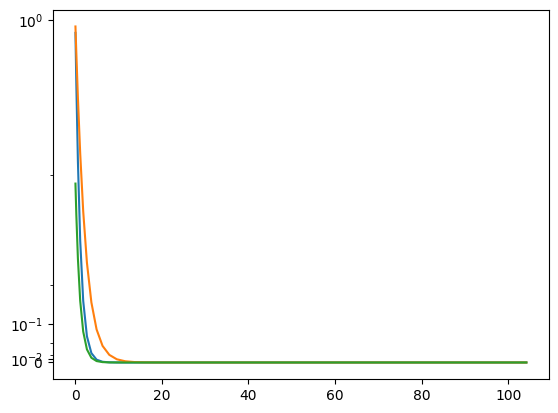

In [5]:
plt.plot(xs, expl(xs))
plt.plot(xs, expl(xs, l=-0.5))
plt.plot(xs, expl(xs, c=0.5))
plt.yscale('asinh')

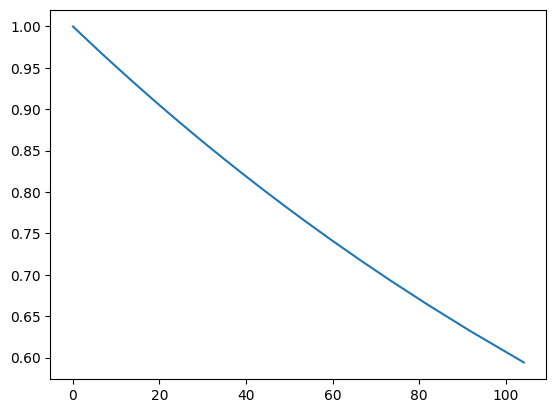

In [6]:
plt.plot(xs, expl(xs, l=-0.005))

In [7]:
def laggauss_integrate(fun, prec=30):
    xs, ws = np.polynomial.laguerre.laggauss(prec)
    return np.dot(ws, fun(xs) * np.exp(xs))

In [8]:
def expl_scaled(xs, l=-1, c=1, s=1):
    return expl(s * xs, l=l, c=c)

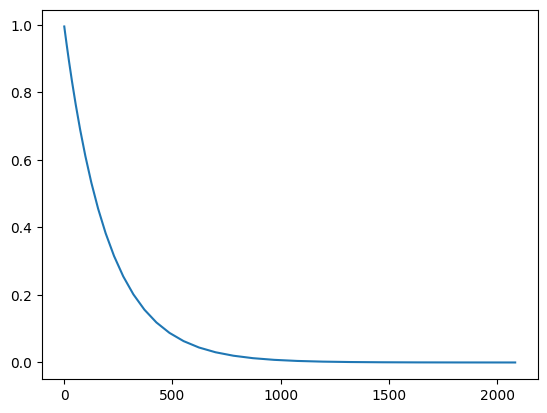

In [9]:
plt.plot(xs * 20, expl_scaled(xs, l=-0.005, s=20))

In [10]:
laggauss_integrate(lambda x: expl_scaled(x, l=-0.005, s=20), prec=30) * 20

199.997741114409

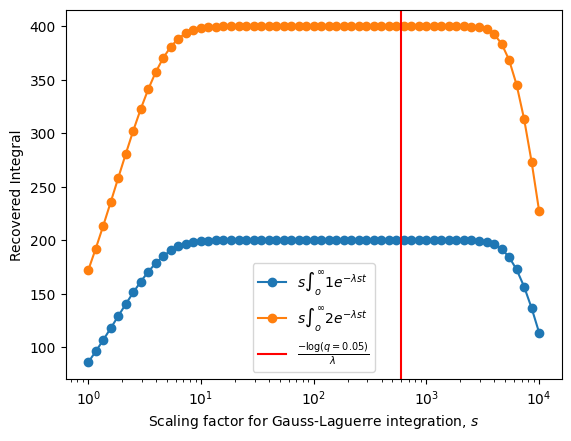

In [11]:
ss = np.logspace(0, 4, num=61, base=10.0)

plt.semilogx(ss,
             [s * laggauss_integrate(
                 lambda x: expl_scaled(x, l=-0.005, c=1, s=s), 
                 prec=30)
              for s in ss],
             'o-',
             label=r'$s\int_o^\infty 1 e^{-\lambda st}$'
            )
plt.semilogx(ss,
             [s * laggauss_integrate(
                 lambda x: expl_scaled(x, l=-0.005, c=2, s=s), 
                 prec=30)
              for s in ss],
             'o-',
             label=r'$s\int_o^\infty 2 e^{-\lambda st}$'
            )

plt.axvline(- np.log(0.05) / 0.005, color='r', 
            label=r'$\frac{-\log({q=0.05})}{\lambda}$')
plt.xlabel('Scaling factor for Gauss-Laguerre integration, $s$')
plt.ylabel('Recovered Integral')
plt.legend()

In [12]:
- np.log(0.05) / 0.005

599.1464547107981

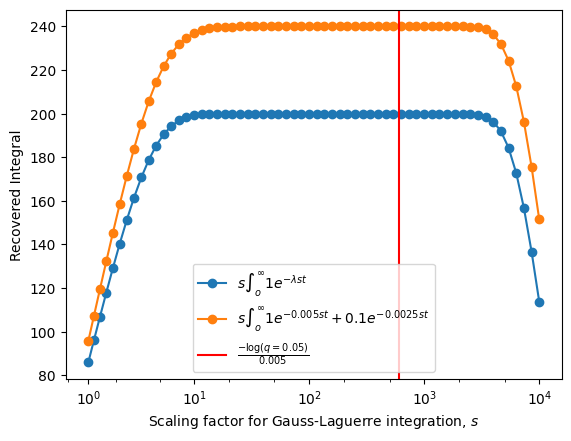

In [13]:
plt.semilogx(ss,
             [s * laggauss_integrate(
                 lambda x: expl_scaled(x, l=-0.005, c=1, s=s), 
                 prec=30)
              for s in ss],
             'o-',
             label=r'$s\int_o^\infty 1 e^{-\lambda st}$'
            )

plt.semilogx(ss,
             [s * laggauss_integrate(
                 lambda x: (
                     expl_scaled(x, l=-0.005, c=1, s=s) 
                     + expl_scaled(x, l=-0.0025, c=0.1, s=s) 
                 ),
                 prec=30)
              for s in ss],
             'o-',
             label=r'$s\int_o^\infty 1 e^{-0.005 st} + 0.1 e^{-0.0025 st}$'
            )


plt.axvline(- np.log(0.05) / 0.005, color='r', 
            label=r'$\frac{-\log({q=0.05})}{0.005}$')
plt.xlabel('Scaling factor for Gauss-Laguerre integration, $s$')
plt.ylabel('Recovered Integral')
plt.legend()
plt.xscale('asinh')

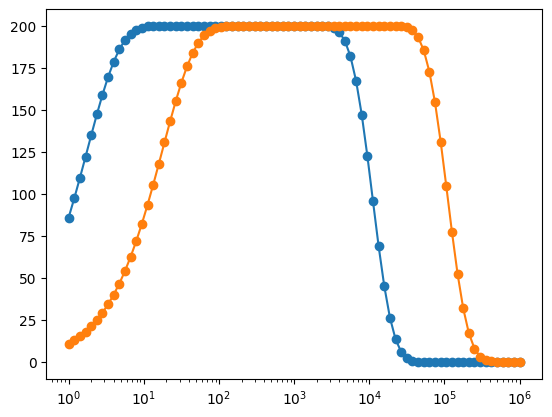

In [14]:
sl = np.logspace(0, 6, num=81, base=10.0)


plt.semilogx(sl,
             [s * laggauss_integrate(
                 lambda x: expl_scaled(x, l=-0.005, c=1, s=s), 
                 prec=30)
              for s in sl],
             'o-',
             label=r'$s\int_o^\infty 1 e^{-\lambda st}$'
            )
plt.semilogx(sl,
             [s * laggauss_integrate(
                 lambda x: expl_scaled(x, l=-0.0005, c=0.1, s=s), 
                 prec=30)
              for s in sl],
             'o-',
             label=r'$s\int_o^\infty 1 e^{-\lambda st}$'
            )

In [15]:
def fexpls(l=-1, c=1, s=1):
    def expls(xs):
        return expl_scaled(xs, l=l, c=c, s=s)
    return expls
    

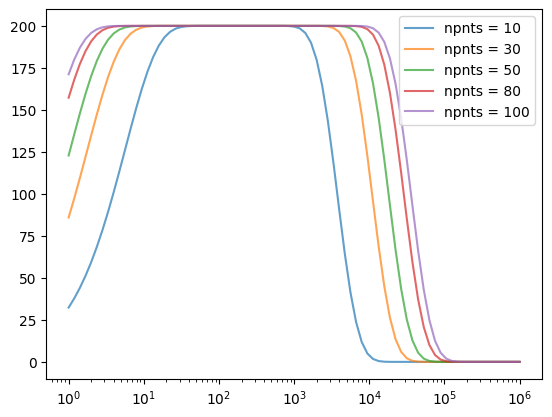

In [16]:
for prec in [10, 30, 50, 80, 100]:
    plt.semilogx(sl,
                 [s * laggauss_integrate(
                     fexpls(-0.005, 1, s), 
                     prec=prec)
                  for s in sl],
                 label=f"npnts = {prec}",
                 alpha=0.7,
                )
plt.legend()

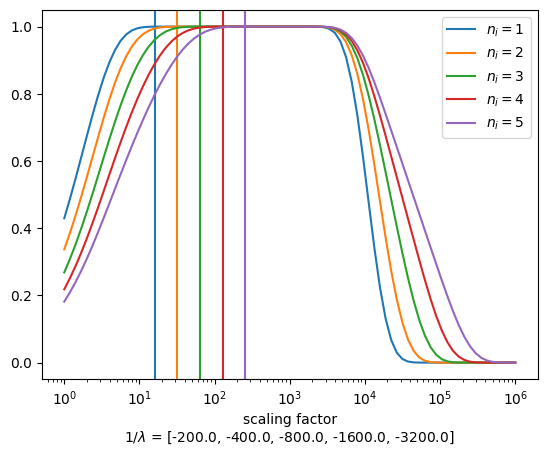

In [17]:
for n_terms in range(1, 5+1):
    lambdas = -0.005 * np.logspace(0, -n_terms+1, num=n_terms, endpoint=True, base=2.0)
    integrals = [s/ len(lambdas) * sum(laggauss_integrate(fexpls(l, c=-l, s=s), prec=30) for l in lambdas) for s in sl]
    plt.semilogx(sl, integrals, label=f"$n_i={n_terms}$")
    # char_t = np.log(0.5) / lambdas
    char_t_cands = [2 / (25*-l) for l in lambdas]
    char_t = max(char_t_cands)
    plt.axvline(char_t, color=f"C{n_terms-1}")
plt.xlabel(rf"""scaling factor
$1/\lambda$ = {[1/l for l in lambdas]}""")
plt.legend()

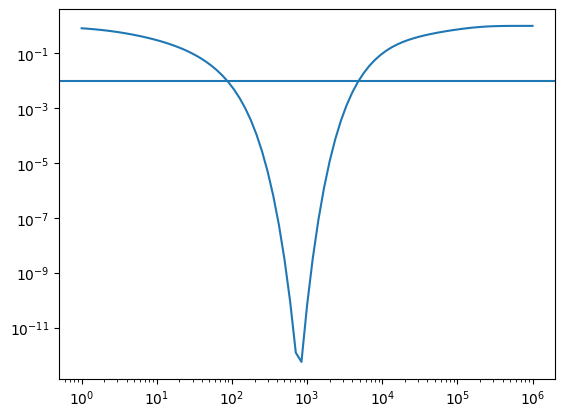

In [18]:
plt.loglog(sl, 1 - np.array(integrals))
plt.axhline(1e-2)

In [19]:
def s_integral(s, n_terms=5):
    # lambdas = -0.005 * np.logspace(0, -n_terms+1, num=n_terms, endpoint=True, base=2.0)
    lambdas = [-0.005 * 0.5**(n_terms-1)]
    return s/len(lambdas) * sum(laggauss_integrate(fexpls(l, c=-l, s=s), prec=30) for l in lambdas)


def s_integral_eq(y0, n_terms=4):
    def s_int_f(s):
        return 1 - s_integral(s, n_terms=n_terms) - y0
    return s_int_f

optimize.fsolve(s_integral_eq(1e-2, 2), 1), optimize.fsolve(s_integral_eq(1e-2, 2), 1e4)


(array([16.32170583]), array([7190.55427387]))

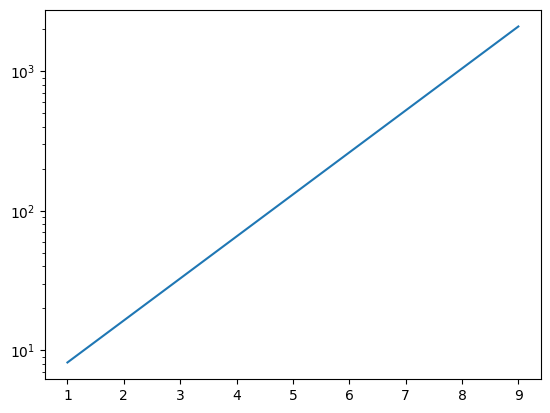

In [20]:
nns = list(range(1, 10))
lh_2 = [optimize.fsolve(s_integral_eq(1e-2, nn), 1) for nn in nns]
plt.semilogy(nns, lh_2)

In [21]:
lh_rg = stats.linregress(nns, np.log2(np.hstack(lh_2)))
lh_rg

LinregressResult(slope=0.9999999999999994, intercept=2.028719940270668, rvalue=1.0, pvalue=3.292585384803146e-70, stderr=0.0, intercept_stderr=0.0)

In [22]:
1/(25 * 0.005 * 0.5**(6-1))

256.0

In [23]:
def fexplsn(l, c, s, n):
    def expls(xs):
        return expl_scaled(xs, l=l, c=c, s=s) ** n
    return expls


def s_integral_n(s, n_terms=5, n_chains=1):
    # lambdas = -0.005 * np.logspace(0, -n_terms+1, num=n_terms, endpoint=True, base=2.0)
    lambdax = -0.005 * 0.5**(n_terms-1)
    return s * laggauss_integrate(fexplsn(lambdax, c=-lambdax, s=s, n=n_chains), prec=30)


3200.0


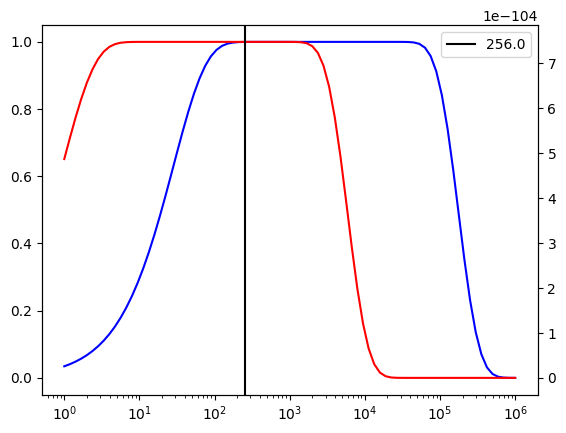

In [24]:
plt.semilogx(sl, [s_integral(s, n_terms=5,) for s in sl], color='blue')
ax2 = plt.twinx(plt.gca())
ax2.semilogx(sl, [s_integral_n(s, n_terms=5, n_chains=30) for s in sl], color='red')
place = 2/(25*0.005 * 0.5**(5-1))
plt.axvline(place, color='black', label=str(place))
plt.legend()
print(1 / (0.005 * 0.5**(5-1)))

In [25]:
q_spec_min = -1e-5
q_spec_max = -0.0005

n_chains = 10
qs_max_v = [s * laggauss_integrate(fexplsn(q_spec_max, c=-q_spec_max, s=s, n=n_chains), prec=50) for s in sl]
qs_min_v = [s * laggauss_integrate(fexplsn(q_spec_min, c=-q_spec_min, s=s, n=n_chains), prec=50) for s in sl]


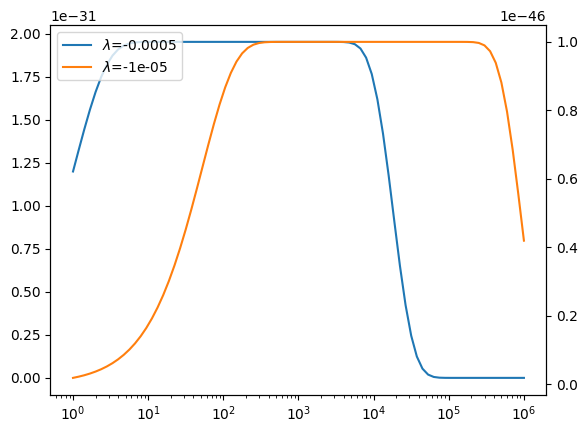

In [26]:
ql1 = plt.semilogx(sl, qs_max_v, label=fr"$\lambda$={q_spec_max}")
ax2 = plt.gca().twinx()
ql2 = ax2.semilogx(sl, qs_min_v, label=fr"$\lambda$={q_spec_min}", color='C1')
plt.legend(handles=[*ql1, *ql2])